In [10]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from data_load import image_data_loader

In [11]:
X, y = image_data_loader()

In [12]:
len(X)

9279

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

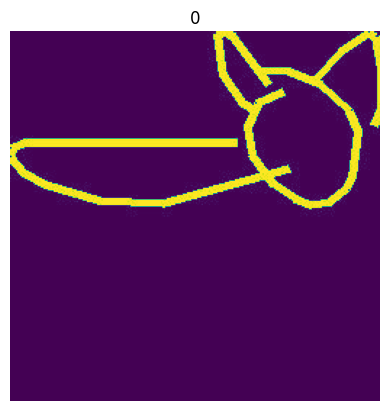

In [14]:
plt.axis('off')
plt.title(y[0])
plt.imshow(X[0])

In [15]:
from sklearn.utils import shuffle

In [16]:
X, y = shuffle(X, y)

In [17]:
def split_to_train_test(data, train_ratio=0.8, test_ratio=0.1):
    SIZE = len(data)
    train = data[:int(SIZE * train_ratio)]
    rest = data[int(SIZE * train_ratio):]
    test = rest[:int(SIZE * test_ratio)]
    val = rest[int(SIZE * test_ratio):]

    print(len(train), len(test), len(val))

    return train, test, val

In [18]:
train_X, test_X, val_X = split_to_train_test(X)

7423 927 929


In [19]:
train_y, test_y, val_y = split_to_train_test(y)


7423 927 929


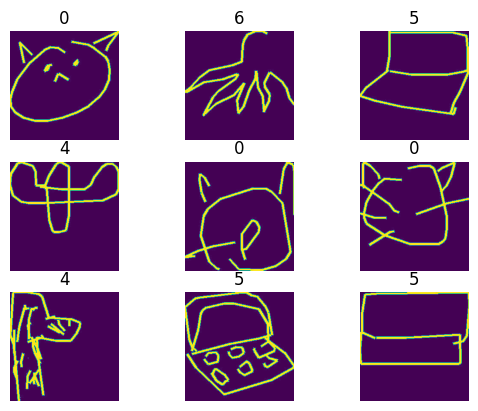

In [20]:
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.axis('off')
    plt.title(int(train_y[i]))
    plt.imshow(train_X[i]);

In [21]:
import pandas as pd

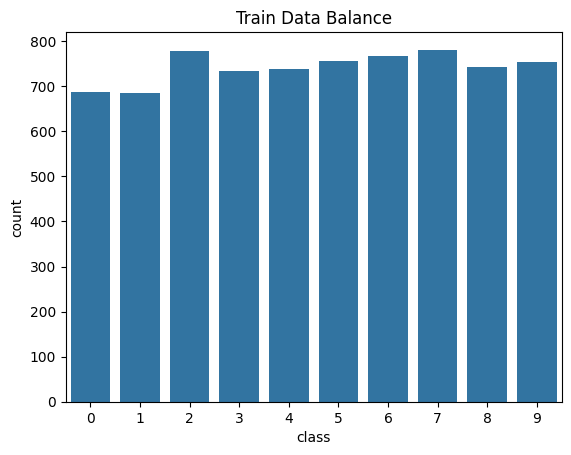

In [22]:
plt.title('Train Data Balance')
classes_df = pd.DataFrame({'class': train_y})
sns.countplot(data=classes_df, x='class');

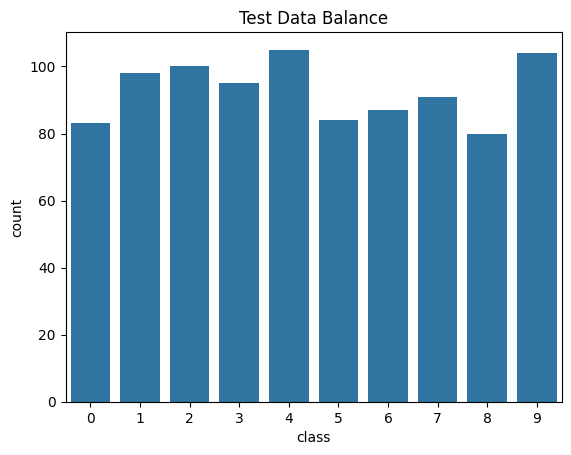

In [23]:
plt.title('Test Data Balance')
classes_df = pd.DataFrame({'class': test_y})
sns.countplot(data=classes_df, x='class');

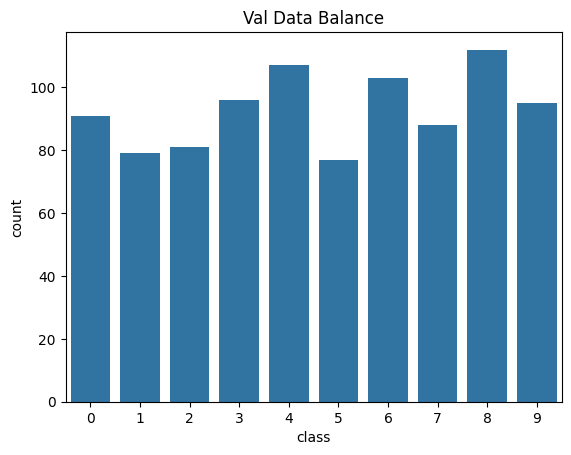

In [24]:
plt.title('Val Data Balance')
classes_df = pd.DataFrame({'class': val_y})
sns.countplot(data=classes_df, x='class');

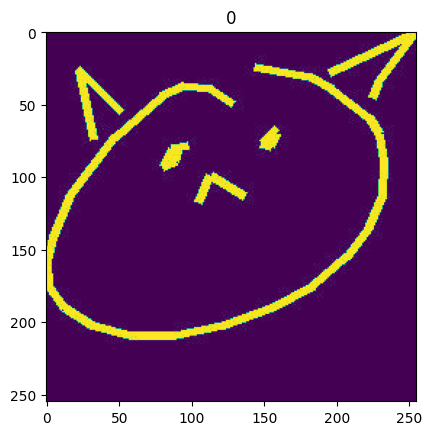

In [25]:
plt.title(train_y[0])
plt.imshow(train_X[0])

# **MODEL**

In [26]:
"""
If your Y
is are one-hot encoded, use categorical_crossentropy.
Examples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]

But if your Y
is are integers, use sparse_categorical_crossentropy.
Examples for above 3-class classification problem: [1] , [2], [3]
"""

'\nIf your Y\nis are one-hot encoded, use categorical_crossentropy.\nExamples (for a 3-class classification): [1,0,0] , [0,1,0], [0,0,1]\n\nBut if your Y\nis are integers, use sparse_categorical_crossentropy.\nExamples for above 3-class classification problem: [1] , [2], [3]\n'

In [27]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [28]:
train_X = np.expand_dims(train_X, axis=3)
test_X = np.expand_dims(test_X, axis=3)
val_X = np.expand_dims(val_X, axis=3)
train_X.shape

(7423, 255, 255, 1)

In [29]:
input_shape = train_X.shape[1:]
input_shape

(255, 255, 1)

In [30]:
from data_loader import categories

In [31]:
num_classes = len(categories)
num_classes

10

In [32]:
model = Sequential([
    layers.Rescaling(1./255, input_shape=input_shape),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),
    layers.Conv2D(2, (3, 3), activation='relu'),
    layers.MaxPool2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(512, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 255, 255, 1)       0         
                                                                 
 conv2d (Conv2D)             (None, 253, 253, 2)       20        
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 2)       0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 126, 126, 2)       8         
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 2)       38        
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 2)         0

In [34]:
model.compile(
    optimizer=Adam(),
    loss=SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [35]:
from tensorflow.keras import callbacks

In [36]:
cbs = [
    callbacks.ModelCheckpoint(
        'model_saves',
        save_weights_only=True
    ),
    callbacks.EarlyStopping(
        patience=5,
        min_delta=0.001
    )
]

In [37]:
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=30,
    verbose=2,
    callbacks=cbs,
    shuffle=True
)

Epoch 1/30


232/232 - 16s - loss: 1.2366 - accuracy: 0.6127 - val_loss: 3.4951 - val_accuracy: 0.2831 - 16s/epoch - 69ms/step
Epoch 2/30
232/232 - 14s - loss: 0.4583 - accuracy: 0.8514 - val_loss: 1.6079 - val_accuracy: 0.6050 - 14s/epoch - 62ms/step
Epoch 3/30
232/232 - 15s - loss: 0.2474 - accuracy: 0.9197 - val_loss: 0.9127 - val_accuracy: 0.7643 - 15s/epoch - 64ms/step
Epoch 4/30
232/232 - 15s - loss: 0.1620 - accuracy: 0.9468 - val_loss: 1.0640 - val_accuracy: 0.7524 - 15s/epoch - 64ms/step
Epoch 5/30
232/232 - 15s - loss: 0.1134 - accuracy: 0.9635 - val_loss: 1.0052 - val_accuracy: 0.7912 - 15s/epoch - 64ms/step
Epoch 6/30
232/232 - 15s - loss: 0.0985 - accuracy: 0.9706 - val_loss: 2.7208 - val_accuracy: 0.5899 - 15s/epoch - 63ms/step
Epoch 7/30
232/232 - 15s - loss: 0.0838 - accuracy: 0.9727 - val_loss: 1.0463 - val_accuracy: 0.8181 - 15s/epoch - 64ms/step
Epoch 8/30
232/232 - 15s - loss: 0.0770 - accuracy: 0.9752 - val_loss: 0.9443 - val_accuracy: 0.8213 - 15s/epoch - 64ms/ste

In [38]:
model.evaluate(test_X, test_y)

29/29 [==============================] - 0s 9ms/step - loss: 0.7890 - accuracy: 0.8403


[0.7889755964279175, 0.8403452038764954]

In [39]:
pred = model.predict(test_X)

29/29 [==============================] - 0s 8ms/step


In [40]:
np.argmax(pred[0])

1

In [41]:
test_y[0]

1

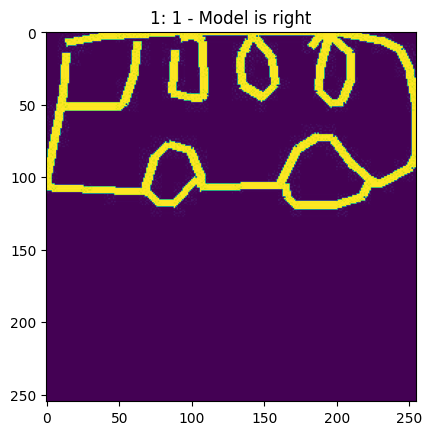

In [42]:
plt.title(f'{np.argmax(pred[0])}: {test_y[0]} - Model is {"right" if np.argmax(pred[0]) == test_y[0] else "wrong"}')
plt.imshow(test_X[0])

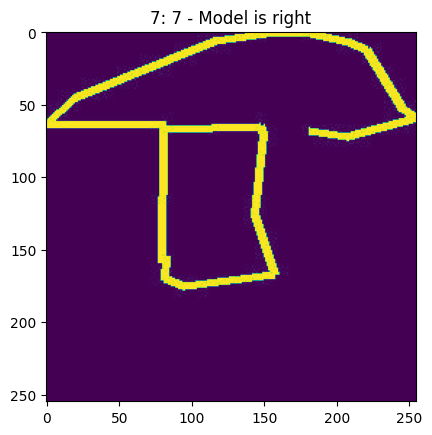

In [43]:
plt.title(f'{np.argmax(pred[1])}: {test_y[1]} - Model is {"right" if np.argmax(pred[1]) == test_y[1] else "wrong"}')
plt.imshow(test_X[1])